# Задача

Вам дан файл `beauty.csv`, в котором собраны несколько факторов про различных людей (мужчин и женщин): зарплата, опыт, цвет кожи, здоровье и т.д.

В последней колонке - целевое значение, которое требуется предсказать. Это то, как выглядит человек (красота) по шкале от 1 до 5. Принимаем, что это задача регрессии, т.е. на выходе могут получаться предикты вроде 3.6

Сначала нужно считать файл и убедиться, что все корректно сохранилось в таблицу.

In [1]:
import pandas as pd

In [4]:
with open('beauty.csv') as f:
    df = pd.read_csv(f, sep=';')

In [5]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


#### Вывести распределение таргета

Визуально определить, к какому распределению принадлежит эта величина

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

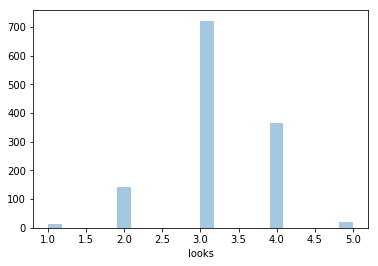

In [10]:
sns.distplot(df['looks'], kde=False)
plt.show()

#### Разделить выборку на train и test с помощью sklearn

А потом убедиться, что распределения таргетов в каждой выборке схожи.

In [12]:
from sklearn import model_selection

In [13]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    df[['wage','exper','union','goodhlth','black','female','married','service','educ']], 
    df['looks'], 
    test_size=0.33, 
    random_state=22,
)

In [14]:
X_train.shape

(844, 9)

In [15]:
X_test.shape

(416, 9)

#### Провести регрессионный анализ

#### Вывести с помощью barh значимость факторов

Что влияет сильнее всего? Слабее всего?

#### Посчитать ошибку (какую сочтете нужным)

## Задание 2

Провести аналогичный регрессионный анализ, но реализовать Метод наименьших квадратов (МНК) самостоятельно, не используя функции библиотеки sklearn.

## Задание 3

Добавить фактор looks_good(если looks больше 3, то 1, меньше 0)

Не использую looks предсказать использия логистическую регрессию looks_good

In [ ]:
# your code here